In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [35]:
# (x_train_orig, y_train_orig), (x_test_orig, y_test_orig) = tf.keras.datasets.mnist.load_data()

In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import scipy.misc as smp
import matplotlib.pyplot as plt
import numpy as np
import os, shutil
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix
from keras import models, optimizers, Sequential, regularizers, layers
from keras.models import load_model, model_from_json
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.utils import to_categorical
from keras.applications import VGG16, VGG19
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from keras.layers import Flatten, Dropout, Reshape, Dense, GlobalAveragePooling2D
from keras.layers.convolutional import Conv2D, MaxPooling2D
import itertools

np.random.seed(123)

Using TensorFlow backend.


In [33]:
def plot_confusion_matrix(cm, classes,
             normalize=False,
             title='Confusion matrix',
             cmap=plt.cm.Blues):
    #Add Normalization Option
    '''prints pretty confusion metric with normalization option '''
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
#     print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
y_train.shape

(60000,)

In [4]:
x_train[0].shape

(28, 28)

In [5]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [6]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [7]:
X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.20, random_state=123, stratify = y_train)


In [15]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

## 1

In [8]:
cnn = models.Sequential()
cnn.add(layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28,28,1)))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(14, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(7, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(300, activation='relu'))
cnn.add(layers.Dropout(0.3))
cnn.add(layers.Dense(150, activation='relu'))
cnn.add(layers.Dense(10, activation='softmax'))

cnn.compile(loss='categorical_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [17]:
# accidentally saved model 1 as vgg16_1.h5
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')
tensorboard = TensorBoard()


In [18]:
cnn_hist = cnn.fit(X_train,
                y_train,
                epochs=50,
                batch_size=32,
                validation_data=(X_val, y_val),
                callbacks=[early, checkpoint, tensorboard])
# logs below are for the second run after training for ~15 epochs

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 20s 424us/step - loss: 0.0777 - acc: 0.9752 - val_loss: 0.0868 - val_acc: 0.9738

Epoch 00001: val_acc improved from -inf to 0.97375, saving model to vgg16_1.h5
Epoch 2/50
48000/48000 [==============================] - 20s 425us/step - loss: 0.0785 - acc: 0.9755 - val_loss: 0.0899 - val_acc: 0.9723

Epoch 00002: val_acc did not improve from 0.97375
Epoch 3/50
48000/48000 [==============================] - 21s 445us/step - loss: 0.0753 - acc: 0.9765 - val_loss: 0.0894 - val_acc: 0.9734

Epoch 00003: val_acc did not improve from 0.97375
Epoch 4/50
48000/48000 [==============================] - 19s 400us/step - loss: 0.0751 - acc: 0.9760 - val_loss: 0.0851 - val_acc: 0.9748

Epoch 00004: val_acc improved from 0.97375 to 0.97483, saving model to vgg16_1.h5
Epoch 5/50
48000/48000 [==============================] - 20s 414us/step - loss: 0.0735 - acc: 0.9773 - val_loss: 0.0884 - val_ac

KeyboardInterrupt: 

## 2

In [20]:
# removing one conv-max block
cnn2 = models.Sequential()
cnn2.add(layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28,28,1)))
cnn2.add(layers.MaxPooling2D((2, 2)))
cnn2.add(layers.Conv2D(14, (3, 3), activation='relu'))
cnn2.add(layers.MaxPooling2D((2, 2)))
cnn2.add(layers.Flatten())
cnn2.add(layers.Dense(300, activation='relu'))
cnn2.add(layers.Dropout(0.3))
cnn2.add(layers.Dense(150, activation='relu'))
cnn2.add(layers.Dense(10, activation='softmax'))

cnn2.compile(loss='categorical_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

In [21]:
checkpoint = ModelCheckpoint("cnn_2.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')
tensorboard = TensorBoard()

In [22]:
cnn_hist = cnn2.fit(X_train,
                y_train,
                epochs=50,
                batch_size=32,
                validation_data=(X_val, y_val),
                callbacks=[early, checkpoint, tensorboard])

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 20s 412us/step - loss: 0.7122 - acc: 0.7694 - val_loss: 0.2243 - val_acc: 0.9292

Epoch 00001: val_acc improved from -inf to 0.92917, saving model to cnn_2.h5
Epoch 2/50
48000/48000 [==============================] - 19s 405us/step - loss: 0.2304 - acc: 0.9280 - val_loss: 0.1444 - val_acc: 0.9567

Epoch 00002: val_acc improved from 0.92917 to 0.95667, saving model to cnn_2.h5
Epoch 3/50
48000/48000 [==============================] - 19s 400us/step - loss: 0.1664 - acc: 0.9485 - val_loss: 0.1656 - val_acc: 0.9446

Epoch 00003: val_acc did not improve from 0.95667
Epoch 4/50
48000/48000 [==============================] - 19s 403us/step - loss: 0.1345 - acc: 0.9575 - val_loss: 0.1021 - val_acc: 0.9683

Epoch 00004: val_acc improved from 0.95667 to 0.96825, saving model to cnn_2.h5
Epoch 5/50
48000/48000 [==============================] - 19s 405us/step - loss: 0.1153 - acc: 0.9645 -

48000/48000 [==============================] - 19s 401us/step - loss: 0.0190 - acc: 0.9936 - val_loss: 0.0443 - val_acc: 0.9889

Epoch 00040: val_acc did not improve from 0.98950
Epoch 41/50
48000/48000 [==============================] - 19s 401us/step - loss: 0.0193 - acc: 0.9931 - val_loss: 0.0404 - val_acc: 0.9891

Epoch 00041: val_acc did not improve from 0.98950
Epoch 42/50
48000/48000 [==============================] - 19s 402us/step - loss: 0.0189 - acc: 0.9934 - val_loss: 0.0400 - val_acc: 0.9902

Epoch 00042: val_acc improved from 0.98950 to 0.99025, saving model to cnn_2.h5
Epoch 43/50
48000/48000 [==============================] - 20s 409us/step - loss: 0.0185 - acc: 0.9936 - val_loss: 0.0436 - val_acc: 0.9892

Epoch 00043: val_acc did not improve from 0.99025
Epoch 44/50
48000/48000 [==============================] - 20s 408us/step - loss: 0.0171 - acc: 0.9944 - val_loss: 0.0419 - val_acc: 0.9888

Epoch 00044: val_acc did not improve from 0.99025
Epoch 45/50
48000/48000 [==

In [25]:
print(classification_report(y_test.argmax(axis=1),cnn2.predict(x_test).argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.98      0.99      0.98      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [28]:
cnn2.predict(x_test).argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6])

In [30]:
y_test.argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6])

Confusion matrix, without normalization


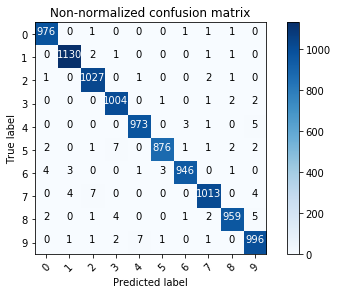

In [37]:
cm_ = confusion_matrix(y_test.argmax(axis = 1), cnn2.predict(x_test).argmax(axis=1))
classes_ = [str(i) for i in range(10)]
plot_confusion_matrix(cm_, classes = classes_, normalize=False,
                      title='Non-normalized confusion matrix')